# Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df = pd.read_fwf("brain_body.txt")

In [35]:
df                      #shape(62,2)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [16]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [17]:
df.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [18]:
df.shape

(62, 2)

In [19]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [20]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


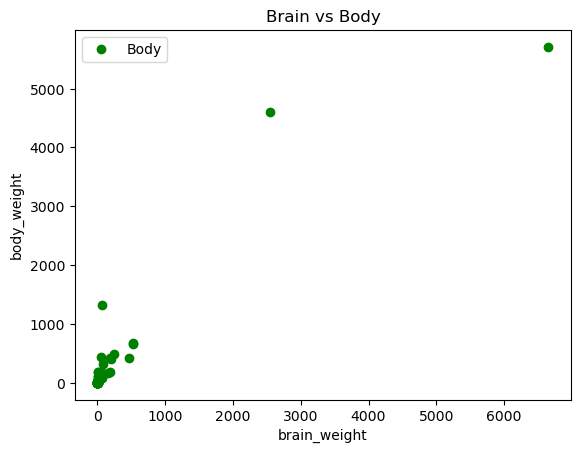

In [36]:
df.plot(x='Brain', y='Body', style='o',c="g")
plt.title('Brain vs Body')
plt.xlabel('brain_weight')
plt.ylabel('body_weight')
plt.legend()
plt.show()

# IQR and finding the lower and upper thershold 

In [21]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower_thershold ", lower_limit)
    print("Upper_thershold ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Brain is 47.6025
Lower_thershold  -70.80375000000001
Upper_thershold  119.60625
Outlier is Presented In Brain


Interquartile Range of Body is 161.75
Lower_thershold  -238.375
Upper_thershold  408.625
Outlier is Presented In Body




### what are the outlier and detecting that seperatly column wise

In [24]:
def Outlier_Data_Points(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.empty: 
      print("No Outlier is Presented In",i )
    else:
      print("Outlier is Presented In " + i + " is")
      for j in outliers[i]:
        print(j)
      print("\n")
Outlier_Data_Points(df)

Outlier is Presented In Brain is
465.0
2547.0
187.1
521.0
529.0
207.0
6654.0
250.0
192.0
160.0


Outlier is Presented In Body is
423.0
4603.0
419.0
655.0
680.0
1320.0
5712.0
490.0
440.0




In [38]:
df.Brain = df.Brain.clip(-70.80, 119.60)            #clip the outlier inside the clip given limit the thershold will changed another method also having capping(refer)

In [39]:
df.Body = df.Body.clip(-238.3,408.6)

### Now outlier are cliped by using clip()

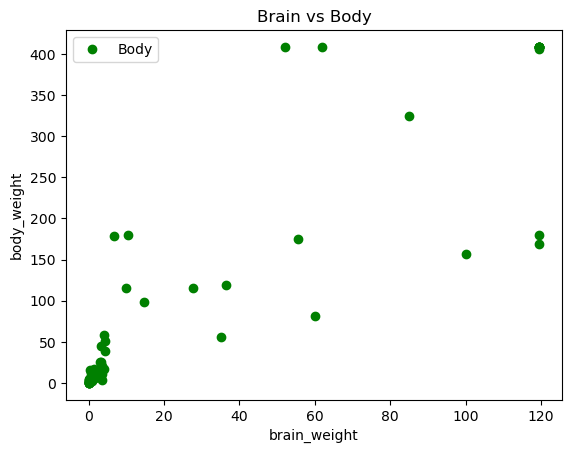

In [92]:
df.plot(x='Brain', y='Body', style='o',c="g")        
plt.title('Brain vs Body')
plt.xlabel('brain_weight')
plt.ylabel('body_weight')
plt.legend()
plt.show()

In [43]:
df.corr()

,Brain,Body
Brain,1.000000,0.888244
Body,0.888244,1.000000


In [74]:
from sklearn.model_selection import train_test_split
X = df.loc[:, ['Brain']].values 
y = df.loc[:, 'Body'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 6)

# 1. Find the linear regression equation for this data for brain weight to body weight.

### y=m*x+c

In [75]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = regressor.predict(X_test) 
y_pred

array([354.61779999,  19.68275879,  26.30744394,  17.03853478,
        35.95490654,  44.99498863,  16.77298237, 354.61779999,
        17.5357393 , 173.53365575, 354.61779999,  20.69976803,
        26.91482446,  28.70871575,  58.63986252,  18.86350135,
        16.88033335,  16.91423365,  26.06731676])

In [77]:
New_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_data

,Actual,Predicted
0,408.60,354.617800
1,5.50,19.682759
2,44.50,26.307444
3,2.50,17.038535
4,179.00,35.954907
5,115.00,44.994989
6,0.25,16.772982
7,408.60,354.617800
8,1.90,17.535739
9,175.00,173.533656


In [79]:
print(regressor.intercept_) # c
print(regressor.coef_) # slope - m

16.744732115835646
[2.82502565]


# 2. Chart the original data and the equation on the chart.

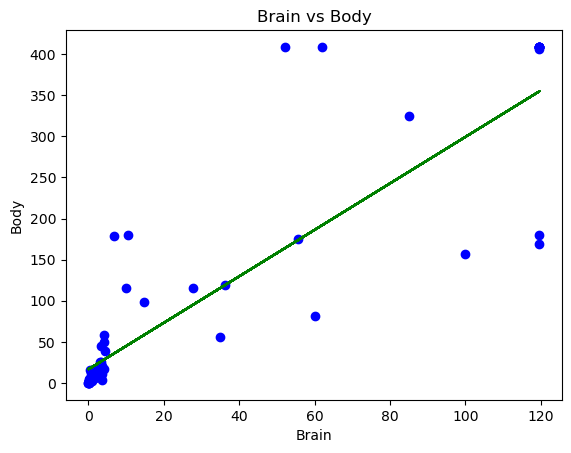

In [90]:
y_predi = regressor.predict(X)

plt.plot(X,y,"o",c="b")
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.plot(X, y_predi,"g")

# 3. Find the equation's  𝑅2  score (use the.score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [80]:
from sklearn import metrics                              # metrics will contain all the evaluation metrics  where random_State at 6
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9018508782193447


# R^2 value is 0.90 which is considered